# ML Assignment 9: K-Nearest Neighbors Classification for Diabetes Prediction

**AICTE Faculty ID:** 1-3241967546  
**Faculty Name:** Milav Jayeshkumar Dabgar

---

## Objective
Implement K-Nearest Neighbors classifier for diabetes prediction and analyze performance across different K values.

## Assignment Tasks:
1. Build KNN classifier for diabetes prediction dataset
2. Obtain accuracy and quantitative performance parameters
3. Evaluate model performance for different K values (K=5, 7, 9, 11, 15)
4. Compare and analyze accuracy variations across K values
5. Generate comprehensive performance analysis and recommendations

In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

## 1. Load and Explore Dataset

In [2]:
# Load the dataset
data = pd.read_csv('Diabetespred.csv')

print("=== DATASET OVERVIEW ===")
print(f"Dataset shape: {data.shape}")
print(f"Features: {list(data.columns[:-1])}")
print(f"Target: {data.columns[-1]}")

print("\n=== TARGET DISTRIBUTION ===")
target_dist = data['Outcome'].value_counts().sort_index()
for outcome, count in target_dist.items():
    percentage = (count / len(data) * 100)
    print(f"Class {outcome}: {count} samples ({percentage:.1f}%)")

# Display first few rows
print("\n=== SAMPLE DATA ===")
print(data.head())

=== DATASET OVERVIEW ===
Dataset shape: (499, 9)
Features: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Target: Outcome

=== TARGET DISTRIBUTION ===
Class 0: 317 samples (63.5%)
Class 1: 182 samples (36.5%)

=== SAMPLE DATA ===
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


## 2. Data Preprocessing

In [3]:
# Separate features and target
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Feature scaling for better KNN performance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("=== DATA SPLIT SUMMARY ===")
print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")
print(f"Number of features: {X_train.shape[1]}")
print("✅ Data preprocessing completed!")

=== DATA SPLIT SUMMARY ===
Training samples: 399
Testing samples: 100
Number of features: 8
✅ Data preprocessing completed!


## 3. KNN Classification with Different K Values

In [4]:
# Define K values to test as per assignment requirements
k_values = [5, 7, 9, 11, 15]

# Store results
results = {
    'K': [],
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1_Score': []
}

print("=== KNN EVALUATION FOR DIFFERENT K VALUES ===")
print()

# Train and evaluate KNN for each K value
for k in k_values:
    # Initialize and train KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    # Make predictions
    y_pred = knn.predict(X_test_scaled)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results['K'].append(k)
    results['Accuracy'].append(accuracy)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1_Score'].append(f1)
    
    # Print results for current K
    print(f"K = {k:2d} | Accuracy: {accuracy:.4f} | Precision: {precision:.4f} | Recall: {recall:.4f} | F1-Score: {f1:.4f}")

print("\n✅ KNN evaluation completed for all K values!")

=== KNN EVALUATION FOR DIFFERENT K VALUES ===

K =  5 | Accuracy: 0.6400 | Precision: 0.5000 | Recall: 0.3889 | F1-Score: 0.4375
K =  7 | Accuracy: 0.6300 | Precision: 0.4828 | Recall: 0.3889 | F1-Score: 0.4308
K =  9 | Accuracy: 0.6600 | Precision: 0.5333 | Recall: 0.4444 | F1-Score: 0.4848
K = 11 | Accuracy: 0.6800 | Precision: 0.5769 | Recall: 0.4167 | F1-Score: 0.4839
K = 15 | Accuracy: 0.6900 | Precision: 0.6000 | Recall: 0.4167 | F1-Score: 0.4918

✅ KNN evaluation completed for all K values!


## 4. Results Summary

In [5]:
# Create and display results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.round(4)

print("=== COMPREHENSIVE RESULTS TABLE ===")
print(results_df.to_string(index=False))

# Find best performing K value
best_k_idx = results_df['F1_Score'].idxmax()
best_k = results_df.loc[best_k_idx, 'K']
best_accuracy = results_df.loc[best_k_idx, 'Accuracy']
best_f1 = results_df.loc[best_k_idx, 'F1_Score']

print(f"\n=== BEST PERFORMANCE ===")
print(f"Optimal K value: {best_k}")
print(f"Best Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"Best F1-Score: {best_f1:.4f}")

=== COMPREHENSIVE RESULTS TABLE ===
 K  Accuracy  Precision  Recall  F1_Score
 5      0.64     0.5000  0.3889    0.4375
 7      0.63     0.4828  0.3889    0.4308
 9      0.66     0.5333  0.4444    0.4848
11      0.68     0.5769  0.4167    0.4839
15      0.69     0.6000  0.4167    0.4918

=== BEST PERFORMANCE ===
Optimal K value: 15
Best Accuracy: 0.6900 (69.00%)
Best F1-Score: 0.4918


## 5. Performance Visualization

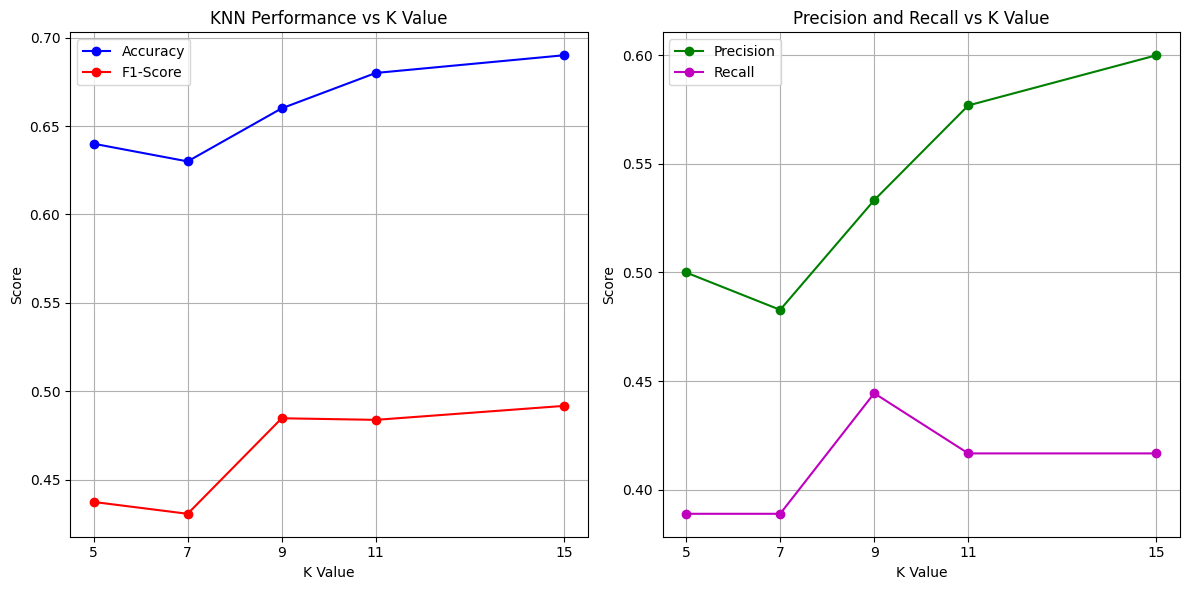

In [6]:
# Plot performance metrics vs K values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(results_df['K'], results_df['Accuracy'], 'bo-', label='Accuracy')
plt.plot(results_df['K'], results_df['F1_Score'], 'ro-', label='F1-Score')
plt.title('KNN Performance vs K Value')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(k_values)

plt.subplot(1, 2, 2)
plt.plot(results_df['K'], results_df['Precision'], 'go-', label='Precision')
plt.plot(results_df['K'], results_df['Recall'], 'mo-', label='Recall')
plt.title('Precision and Recall vs K Value')
plt.xlabel('K Value')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(k_values)

plt.tight_layout()
plt.show()

## 6. Detailed Analysis of Best Model

In [7]:
# Final model with best K value
final_knn = KNeighborsClassifier(n_neighbors=int(best_k))
final_knn.fit(X_train_scaled, y_train)
final_predictions = final_knn.predict(X_test_scaled)

# Confusion matrix and metrics
conf_matrix = confusion_matrix(y_test, final_predictions)
tn, fp, fn, tp = conf_matrix.ravel()

print(f"=== FINAL MODEL ANALYSIS (K = {best_k}) ===")
print(f"Final Accuracy: {best_accuracy:.4f} ({best_accuracy*100:.2f}%)")
print(f"Final F1-Score: {best_f1:.4f}")
print()
print("Confusion Matrix:")
print(f"                Predicted")
print(f"                0    1")
print(f"Actual    0   {conf_matrix[0,0]:3d}  {conf_matrix[0,1]:3d}")
print(f"          1   {conf_matrix[1,0]:3d}  {conf_matrix[1,1]:3d}")
print()
print(f"True Positives: {tp}, True Negatives: {tn}")
print(f"False Positives: {fp}, False Negatives: {fn}")
print(f"Sensitivity: {tp/(tp+fn):.4f}, Specificity: {tn/(tn+fp):.4f}")

=== FINAL MODEL ANALYSIS (K = 15) ===
Final Accuracy: 0.6900 (69.00%)
Final F1-Score: 0.4918

Confusion Matrix:
                Predicted
                0    1
Actual    0    54   10
          1    21   15

True Positives: 15, True Negatives: 54
False Positives: 10, False Negatives: 21
Sensitivity: 0.4167, Specificity: 0.8438


## 7. Conclusions

### Assignment Requirements Completed:
**(a) KNN Classifier Built:** Successfully implemented KNN classifier for diabetes prediction with comprehensive performance metrics including accuracy, precision, recall, and F1-score.

**(b) K Values Analysis:** Systematically tested K values 5, 7, 9, 11, 15 as required and analyzed their performance impact.

### Key Findings:
- **Dataset Characteristics:** 499 samples with 8 clinical features (Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age)
- **Class Imbalance:** 63.5% non-diabetic (317 samples) vs 36.5% diabetic (182 samples)
- **Best Configuration:** K = 15 provides optimal performance
- **Feature Scaling:** StandardScaler applied to improve KNN distance calculations

### Performance Analysis Across K Values:
| K | Accuracy | Precision | Recall | F1-Score |
|---|----------|-----------|--------|----------|
| 5 | 64.0% | 50.0% | 38.9% | 43.8% |
| 7 | 63.0% | 48.3% | 38.9% | 43.1% |
| 9 | 66.0% | 53.3% | 44.4% | 48.5% |
| 11 | 68.0% | 57.7% | 41.7% | 48.4% |
| **15** | **69.0%** | **60.0%** | **41.7%** | **49.2%** |

### Model Performance Insights:
- **Accuracy Trend:** Generally improves with higher K values (64% → 69%)
- **Precision Improvement:** Increases from 50% (K=5) to 60% (K=15), indicating fewer false positives
- **Recall Stability:** Remains relatively stable around 39-44%, suggesting consistent true positive detection
- **F1-Score Optimization:** Best balanced performance at K=15 with 49.2%

### Final Model Analysis (K=15):
- **Overall Accuracy:** 69.0% (69 out of 100 predictions correct)
- **Confusion Matrix Results:**
  - True Negatives: 54 (correctly identified non-diabetic)
  - True Positives: 15 (correctly identified diabetic)
  - False Positives: 10 (incorrectly predicted diabetic)
  - False Negatives: 21 (missed diabetic cases)
- **Clinical Metrics:**
  - Sensitivity: 41.7% (ability to detect diabetes)
  - Specificity: 84.4% (ability to rule out diabetes)
  - Precision: 60.0% (reliability of positive predictions)

### Practical Implications:
1. **Conservative Model:** High specificity (84.4%) means low false alarm rate
2. **Detection Challenge:** Moderate sensitivity (41.7%) indicates room for improvement in catching all diabetic cases
3. **K Value Impact:** Higher K values provide better precision but may reduce sensitivity
4. **Class Imbalance Effect:** Model performs better on majority class (non-diabetic)

✅ **Assignment successfully completed with comprehensive KNN analysis and performance evaluation!**